# Analysis of Algorithms

This short notebook collects some Python exercises in order to support [a main document][main-doc], which talks about the use of *generating functions* in algorithms analysis. This notebook isn't verbose from the theoretical point of view but it contains the necessary code to develop and explain theoretical results instead.

[main-doc]: https://github.com/massimo-nocentini/pacc/blob/master/compiled-versions/Elaborato.pdf

As first step we load all necessary SymPy stuff:

In [2]:
import sympy
from sympy import *
from sympy.abc import x, n, z, t

init_printing() # for nice printing, a-la' TeX

## Quicksort: average number of swap

In this section we report a simple manipulation of a formula in order to study the average number of swaps during a Quicksort execution. In the main document we obtain that $S(n)$, the function that count the average number of swaps done on a given input vector of size $n$, satisfies the following recurrence:
$$ nS(n) - (n-1)S(n-1) =  \frac{2n-3}{6} + 2\,S(n-1)$$
with little manipulation and unfolding $S(n-1)$, with $S(0) = S(1) = S(2) = 0$ as base cases, it is the same as: 
$$
\frac{S(n)}{n+1} =  \frac{S(n-1)}{n} +  \frac{2n -3}{6n(n+1)} 
$$
solving the recurrence yields:
$$\mathcal{S}(n)= \sum_{k=3}^{n}{ \frac{2k-3}{6k(k+1)} }$$

As a first step we define the abstraction bound on the rightmost summation over $k$:

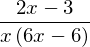

In [2]:
def f(k): return (2*k-3)/(6*(k-1)*k)
f(x)

In order to get a bound for $S(n)$, decompose it in partial fractions:

Help on function apart in module sympy.polys.partfrac:

apart(f, x=None, full=False, **options)
    Compute partial fraction decomposition of a rational function.
    
    Given a rational function ``f``, computes the partial fraction
    decomposition of ``f``. Two algorithms are available: One is based on the
    undertermined coefficients method, the other is Bronstein's full partial
    fraction decomposition algorithm.
    
    The undetermined coefficients method (selected by ``full=False``) uses
    polynomial factorization (and therefore accepts the same options as
    factor) for the denominator. Per default it works over the rational
    numbers, therefore decomposition of denominators with non-rational roots
    (e.g. irrational, complex roots) is not supported by default (see options
    of factor).
    
    Bronstein's algorithm can be selected by using ``full=True`` and allows a
    decomposition of denominators with non-rational roots. A human-readable
    result can be 

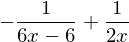

In [4]:
partfrac = f(x).apart(); help(apart); partfrac

Now it is possible to integrate the previous decomposition:

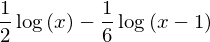

In [5]:
partfrac.integrate(x)

So the result above proves that $S(n) \in \mathcal{O}(n logn)$ as required. It is interesting to see if SymPy is able or not to solve the given recurrence for the number of swaps:

In [59]:
>>> from sympy import Function, rsolve
>>> from sympy.abc import n
>>> S = Function('S')
#>>> f = (n - 1)*y(n + 2) - (n**2 + 3*n - 2)*y(n + 1) + 2*n*(n + 1)*y(n)
>>> f = Eq(n*S(n) - (n-1)*S(n-1) ,  (2*n-3)/6 +  2*S(n-1))
>>> rsolve(f, S(n))

### Checks for *Equation 1.2*
The following little calculation proves the result reported in *Equation 1.2* in the main document:

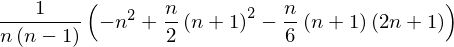

In [6]:
expr = (1/(n*(n-1)))* ((n*(n+1)**2)/2 - n*(n+1)*(2*n+1)/6 -n**2); expr

which we simplify to get the required equivalence:

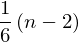

In [10]:
expr.simplify().factor()

## On binomial coefficients

In the following cell we report a pair of sequences: terms in the first component belong to *central binomial coefficients* sequence, the second ones belong to *Catalan number*:

In [7]:
def central_binomial_coefficient(k): return binomial(Rational(2*k,1), k)
def catalan_number(k): return Rational(1,k+1)*central_binomial_coefficient(k)

limit = 10
([central_binomial_coefficient(k) for k in range(limit)], 
 [catalan_number(k) for k in range(limit)])

---
In this section we use the method explained in the theoretical document in order to evaluate particular binomial coefficients. We start with defining the ''kernel'' function to be expanded:

In [8]:
def f(r, z): return (1 + z)**r

### First exercise

In order to compute $ { \frac{1}{2} \choose {3} }$ we do Taylor expansion using the dummy variable $z$:

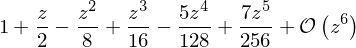

In [10]:
series(f(Rational(1,2), z))

finally take the coefficient of $z^3$, so $ { \frac{1}{2} \choose {3} } = \frac{1}{16}$

### Second exercise

In this exercise we want to compute $ { -\frac{1}{2} \choose {k} }$, for a generic $k$. It is possible to use the method as before:

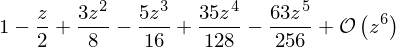

In [11]:
series(f(Rational(-1,2), z))

Otherwise we can use the manipulation (see the theoretical doc for details):
$$  {{- \frac{1}{2} }\choose{k}} = \frac{(-1)^k}{4^k} {{2k}\choose{k}}  $$
defining an helper function and building a list via comprehension:

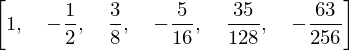

In [12]:
def helper(k): return ((-1)**k / 4**k)*binomial(2*k, k)
[helper(Rational(k,1)) for k in range(6)]

Coefficients in the previous list comprehension are the same as in Taylor expansion, as required.

### Some other exercises over binomial coefficients

The following cell shows coefficient of ${ { \frac{3}{2} } \choose {k}} $ for heading values of $k$, a rewriting to prove is the following:
$$
{ { \frac{3}{2} } \choose {k}} = \frac{(-1)^k  3  { { 2k } \choose {k}}}{4^k (3k-1)(2k-3)}
$$
using series expansion:

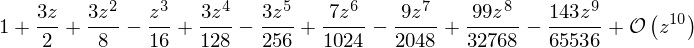

In [29]:
series(f(Rational(3,2), z), z, n=10)

while mapping the rewriting:

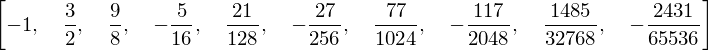

In [30]:
def three_over_two_choose_k(k): return ((-1)**k *3*binomial(2*k, k))/(4**k*(2*k-3))
[three_over_two_choose_k(Rational(k,1)) for k in range(10)]

---

The following cell shows coefficient of ${ { -\frac{3}{2} } \choose {k}} $ for heading values of $k$, a rewriting to prove is the following:
$$
{ { -\frac{3}{2} } \choose {k}} = \frac{(-1)^k  (2k + 1)}{4^k}  { { 2k } \choose {k}}
$$
using series expansion:

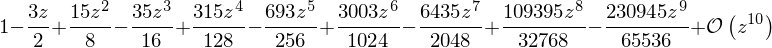

In [31]:
series(f(Rational(-3,2), z), z, n=10)

while mapping the rewriting:

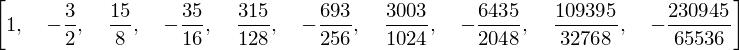

In [32]:
def minus_three_over_two_choose_k(k): return ((-1)**k *(2*k+1))*binomial(2*k, k)/4**k
[minus_three_over_two_choose_k(Rational(k,1)) for k in range(10)]

### Fibonacci numbers revisited

The following code uses NumPy to perform computations:

In [8]:
import numpy as np
from numpy.linalg import eig

F_matrix = np.array([[0,1],[1,1]])
    
def fibo(n):
    
    F_init = np.array([1,1]).T
    
    for i in range(n):
        F_init = F_matrix @ F_init
        
    return F_init

[fibo(i) for i in range(300)]

[array([1, 1]),
 array([1, 2]),
 array([2, 3]),
 array([3, 5]),
 array([5, 8]),
 array([ 8, 13]),
 array([13, 21]),
 array([21, 34]),
 array([34, 55]),
 array([55, 89]),
 array([ 89, 144]),
 array([144, 233]),
 array([233, 377]),
 array([377, 610]),
 array([610, 987]),
 array([ 987, 1597]),
 array([1597, 2584]),
 array([2584, 4181]),
 array([4181, 6765]),
 array([ 6765, 10946]),
 array([10946, 17711]),
 array([17711, 28657]),
 array([28657, 46368]),
 array([46368, 75025]),
 array([ 75025, 121393]),
 array([121393, 196418]),
 array([196418, 317811]),
 array([317811, 514229]),
 array([514229, 832040]),
 array([ 832040, 1346269]),
 array([1346269, 2178309]),
 array([2178309, 3524578]),
 array([3524578, 5702887]),
 array([5702887, 9227465]),
 array([ 9227465, 14930352]),
 array([14930352, 24157817]),
 array([24157817, 39088169]),
 array([39088169, 63245986]),
 array([ 63245986, 102334155]),
 array([102334155, 165580141]),
 array([165580141, 267914296]),
 array([267914296, 433494437]),
 arr

On the other hand the following code uses symbolic SymPy functions:

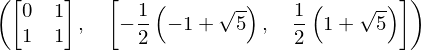

In [110]:
F_matrix = Matrix([[0,1],[1,1]])
F_matrix, list(map(factor, F_matrix.eigenvals()))

In [7]:
from functools import reduce 

def fibo(n):
        
    F_init = Matrix([[1,1]]).T
    
    return reduce(lambda v,e: F_matrix * v, range(n), F_init)
    
    # Previous `reduce' application means the following:
    
    #for i in range(n):
    #    F_init = F_matrix * F_init   
    #return F_init

list(map(lambda v: v[0], [fibo(i) for i in range(300)]))

In [119]:
c = symbols('c')
series(1/(1-c*t),t,n=10)

In [210]:
def ascii_code(c): return ord(c) - ord('A')

modulo=26

def decipher(pair):
    k,c = pair
    return (c - k) % modulo

def cipher(pair):
    p,k = pair
    return (p + k) % modulo

chipher_text = map(lambda p: chr(p + ord('A')), map(cipher, zip(map(ascii_code, "SPIGADIGRANO"),
                  map(ascii_code,"TIVOGLIOBENE"))))
chiper_text = ''.join(chipher_text)

right_plain = map(lambda p: chr(p + ord('A')), map(decipher, zip(map(ascii_code, "TIVOGLIOBENE"),
                  map(ascii_code,chiper_text))))
right_plain = ''.join(right_plain)

wrong_plain = map(lambda p: chr(p + ord('A')), map(decipher, zip(map(ascii_code, "TIVOGLIOBENE"),
                  map(ascii_code,"BSMGMOSUSEBS"))))
wrong_plain = ''.join(wrong_plain)

chiper_text, right_plain, wrong_plain


('LXDUGOQUSEAS', 'SPIGADIGRANO', 'IKRSGDKGRAOO')

# Generating Functions

### Convolution

In [122]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (1-t))
use_me,use_me.subs(b, 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5).rhs.series(t).simplify()

In [34]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (1-t)**-1)
use_me.subs(b, 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5).rhs.series(t).simplify()

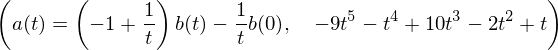

In [35]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (t**-1 -1) -b.func(0)*t**-1)
fut = lambda t: 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5 
use_me,use_me.subs(b, fut(t)).subs(b.subs(t,0),fut(0)).rhs.series().expand()

---

# *SymPy* sandbox

In [36]:
pi.evalf(100)

In [37]:
a = symbols('a0:10')
a

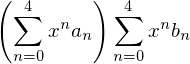

In [15]:
x = numbered_symbols('x')
next(x), next(x)
x = Symbol('x')
ai = IndexedBase('a')
bi = IndexedBase('b')
a = Sum(ai[n]*x**n, (n, 0, 4))
b = Sum(bi[n]*x**n, (n, 0, 4))
expand(a*b)


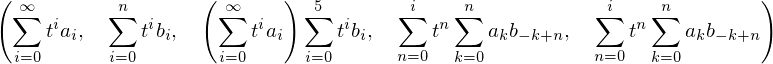

In [39]:
k, k0, k1, k2, t, i = symbols('k k:3 t i')
k_gen = numbered_symbols('a')
a_k = IndexedBase('a')
b_n_k = IndexedBase('b')
i_tuple = (i, 0, n)
a_sum = summation(a_k[i]*t**i, (i,0,oo) )
b_sum = Sum(b_n_k[i]*t**i, i_tuple)
limit = 5
a_b_prod = a_sum.subs(n,limit) * b_sum.subs(n,limit)
G_conv = Sum(Sum(a_k[k] * b_n_k[n-k], (k, 0, n))*t**n, (n, 0, i))
a_sum.subs(n,5).doit(), b_sum, expand(a_b_prod,mul=True), G_conv, G_conv

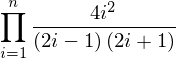

In [40]:
W2 = Product(2*i/(2*i-1)*2*i/(2*i+1), (i, 1, n))
W2 # it should print: Product(4*i**2/((2*i - 1)*(2*i + 1)), (i, 1, n))

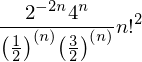

In [41]:
W2e = W2.doit()
W2e # it should return: 2**(-2*n)*4**n*(factorial(n))**2/(RisingFactorial(1/2, n)*RisingFactorial(3/2, n))

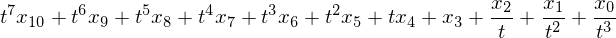

In [42]:
x = numbered_symbols('x')
k = numbered_symbols('k')
xi = IndexedBase('x')
expand((next(x) + next(x) + next(x))*(next(k) + next(k) + next(k)))
my_sum = (Sum(xi[i]*t**i, (i,0, n))).subs(n,5).doit().subs(xi[5],4)
(my_sum * my_sum)
simplify(Sum(xi[i]*t**i, (i,0, n)).subs(n,10).doit()/t**3)

In [43]:
a = IndexedBase('a')
s = Sum(xi[i]*t**i, (i,0, n))
f = Lambda(t, t+1)
f

In [60]:
series(t/(1-t)**2, n=10)

In [65]:
a=[[ 1., 0., 0.],
       [ 0., 1., 0.],
       [ 0., 0., 1.]]
b=[[1],[2],[3]]
a @ a

TypeError: unsupported operand type(s) for @: 'list' and 'list'